In [1]:
for p in ("Knet","JLD","JSON","Images","WordTokenizers")
    Pkg.installed(p) == nothing && Pkg.add(p)
end

In [2]:
using Images,JLD,Knet,WordTokenizers

In [3]:
!isdir("data/demo") && include("demosetup.jl")

INFO: Downloading sample questions and images from CLEVR dataset...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50.5M  100 50.5M    0     0  9509k      0  0:00:05  0:00:05 --:--:-- 10.5M
INFO: Downloading pre-trained model from our servers...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 75.9M  100 75.9M    0     0   661k      0  0:01:57  0:01:57 --:--:--  594k


"models/demo.jld"

In [6]:
global atype = gpu()<0 ? Array{Float32}:KnetArray{Float32}

Knet.KnetArray{Float32,N} where N

In [7]:
include("src/newmacnetwork.jl")

scalepixel (generic function with 1 method)

In [8]:
feats,qstsns,dics = loadDemoData("data/demo/");

INFO: Loading demo features ...
INFO: Loading demo questions ...
INFO: Loading dictionaries ...


In [9]:
_,wrun,r,_,p = loadmodel("models/demo.jld";onlywrun=true);

In [10]:
if !(typeof(first(wrun)) <: atype)
    wrun = map(atype,wrun)
end

29-element Array{Knet.KnetArray{Float32,N} where N,1}:
 Knet.KnetArray{Float32,4}(Knet.KnetPtr(Ptr{Void} @0x0000010410000000, 18874368, 2, nothing), (3, 3, 1024, 512))
 Knet.KnetArray{Float32,4}(Knet.KnetPtr(Ptr{Void} @0x0000010411200000, 2048, 2, nothing), (1, 1, 512, 1))       
 Knet.KnetArray{Float32,4}(Knet.KnetPtr(Ptr{Void} @0x0000010411400000, 9437184, 2, nothing), (3, 3, 512, 512))  
 Knet.KnetArray{Float32,4}(Knet.KnetPtr(Ptr{Void} @0x0000010411200800, 2048, 2, nothing), (1, 1, 512, 1))       
 Knet.KnetArray{Float32,2}(Knet.KnetPtr(Ptr{Void} @0x0000010411e00000, 108000, 2, nothing), (300, 90))          
 Knet.KnetArray{Float32,3}(Knet.KnetPtr(Ptr{Void} @0x0000010412000000, 13336576, 2, nothing), (1, 1, 3334144))  
 Knet.KnetArray{Float32,2}(Knet.KnetPtr(Ptr{Void} @0x0000010412e00000, 2097152, 2, nothing), (512, 1024))       
 Knet.KnetArray{Float32,2}(Knet.KnetPtr(Ptr{Void} @0x0000010411201000, 2048, 2, nothing), (512, 1))             
 Knet.KnetArray{Float32,2}(Knet.KnetPtr(P

In [11]:
w2i,a2i,i2w,i2a = dics;

In [12]:
rnd        = rand(1:length(qstsns))
inst       = qstsns[rnd]
feat       = feats[:,:,:,rnd:rnd]
question   = Array{Int}(inst[2])
answer     = inst[3];
family     = inst[4];
results,prediction = singlerun(wrun,r,feat,question;p=p);

In [34]:
answer==prediction

true

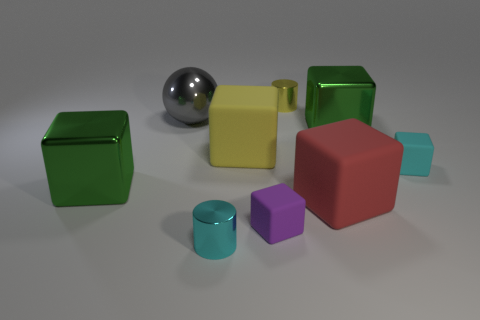

In [13]:
img = load("data/demo/CLEVR_v1.0/images/val/$(inst[1])")

In [14]:
textq  = i2w[question];
println("Question:\n",join(textq," "))
texta  = i2a[answer];
println("Answer: $(texta)\nPrediction: $(i2a[prediction]) ")

Question:
What number of other things are the same material as the big yellow cube ?
Answer: 3
Prediction: 3 


In [27]:
userinput = readline(STDIN)
words = tokenize(userinput)
question = [get!(w2i,wr,1) for wr in words]
results,prediction = singlerun(wrun,r,feat,question;p=p);
println("Question: $(join(i2w[question]," "))")
println("Prediction: $(i2a[prediction])")

stdin> There are two objects in same color ; what color are they ?
Question: There are __UNK__ objects in same color ; what color are __UNK__ ?
Prediction: brown


step_1 most attn. wrds: String["the", "as"]


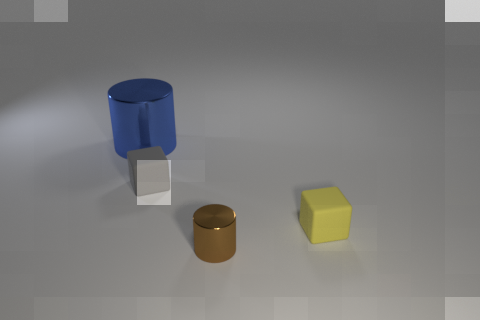

step_2 most attn. wrds: String["?", "What"]


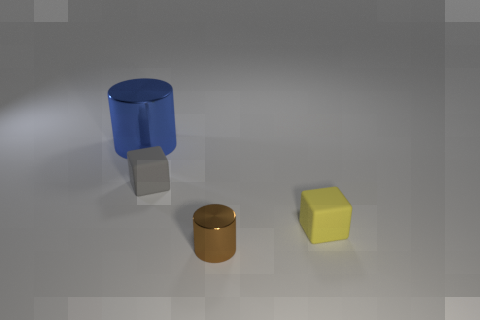

step_3 most attn. wrds: String["?", "as"]


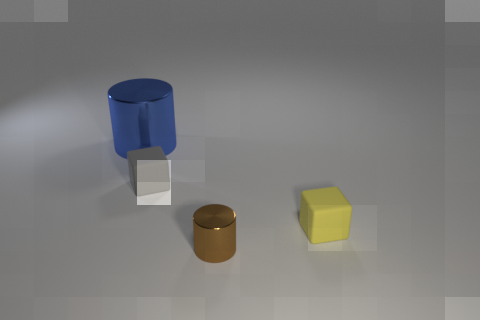

step_4 most attn. wrds: String["there", "are"]


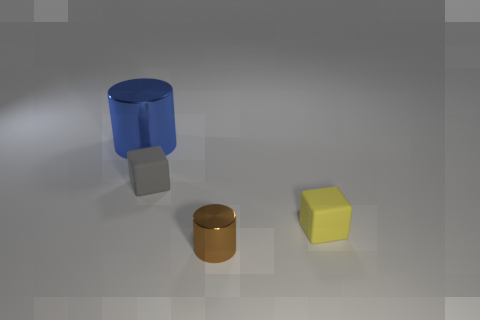

step_5 most attn. wrds: String["?", "What"]


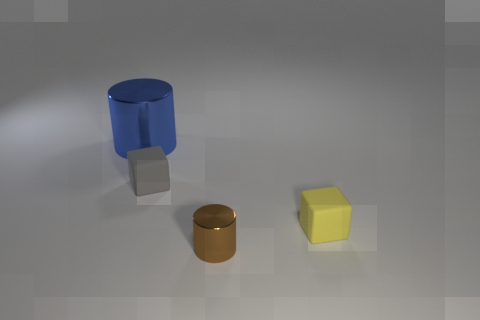

step_6 most attn. wrds: String["gray", "small"]


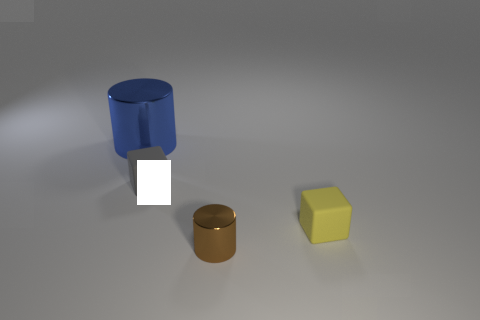

step_7 most attn. wrds: String["are", "same"]


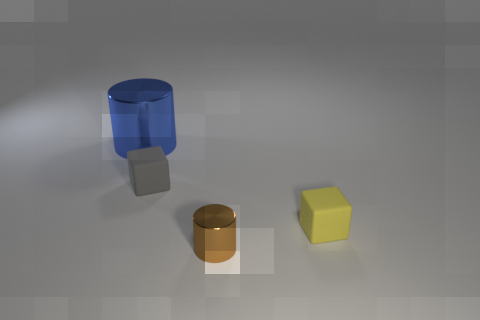

step_8 most attn. wrds: String["other", "things"]


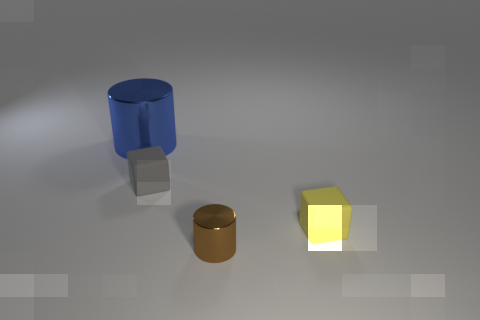

step_9 most attn. wrds: String["?", "as"]


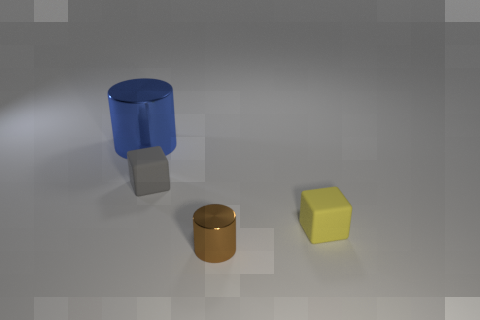

step_10 most attn. wrds: String["same", "things"]


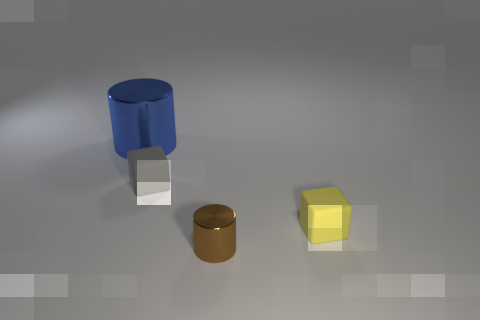

step_11 most attn. wrds: String["What", "number"]


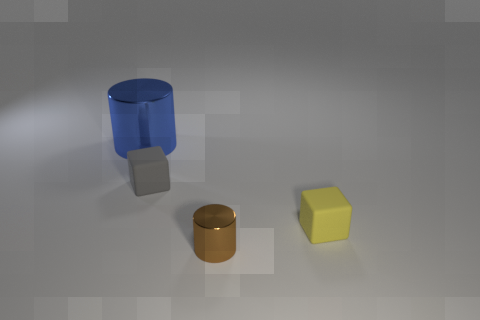

step_12 most attn. wrds: String["number", "of"]


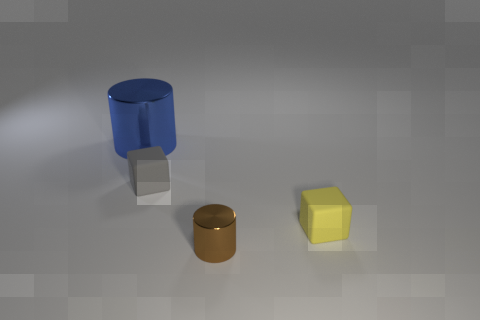

In [37]:
visualize(img,results;p=p)